In [1]:
#Reserved for Variables.
ticker = 'TATAMOTORS.NS'
num_of_days = 4

# Data Retrival and Visualization

In [2]:
from utils.data_utils import get_data

data = get_data(ticker)

[*********************100%***********************]  1 of 1 downloaded


In [3]:
display(data[:10])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-01,65.73,69.18,65.54,69.06,15.61,11680285
1997-01-02,69.56,69.56,67.65,68.36,15.45,12850766
1997-01-03,67.65,68.98,67.48,68.71,15.53,7998983
1997-01-06,68.03,69.03,67.28,67.74,15.31,5613143
1997-01-07,67.60,67.60,65.39,65.91,14.90,11466071
1997-01-08,66.97,68.41,66.54,67.00,15.15,5246292
1997-01-09,67.00,67.55,66.30,66.79,15.10,5631408
1997-01-10,67.45,68.97,67.28,68.52,15.49,9725743
1997-01-13,68.03,68.03,66.94,67.65,15.29,4230535


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5.196000e+03
mean,173.379588,176.044580,170.397652,173.147794,148.808903,1.113871e+07
std,156.357692,158.197767,154.256158,156.161565,167.639822,9.562883e+06
min,11.110000,11.630000,11.030000,11.270000,4.030000,0.000000e+00
25%,44.080000,45.000000,43.055000,43.935000,14.487500,5.083488e+06
50%,120.245000,122.580000,117.940000,120.275000,75.335000,8.215621e+06
75%,270.025000,273.717500,264.835000,269.247500,264.477500,1.370871e+07
max,600.210000,605.900000,589.870000,598.130000,597.890000,1.107443e+08


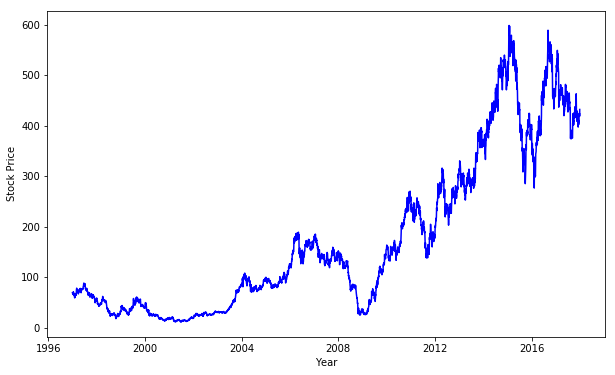

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data["Close"], color='blue')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()

In [7]:
data = data.drop(columns=['Adj Close', 'Volume'])

## Benchmark Model

In [8]:
from models.KNNModel import KNNModel

knn = KNNModel(data, num_of_days)
print("Number of samples for training is {} and testing is {}".format(len(knn.x_train), len(knn.x_test)))

Number of samples for training is 4153 and testing is 1039


In [9]:
print('Data after normalization is as follows')
display(knn.normalized_data[:10])

Data after normalization is as follows


,Open,High,Low,Close
Date,,,,
1997-01-01,0.6573,0.6918,0.6554,0.6906
1997-01-02,0.6956,0.6956,0.6765,0.6836
1997-01-03,0.6765,0.6898,0.6748,0.6871
1997-01-06,0.6803,0.6903,0.6728,0.6774
1997-01-07,0.6760,0.6760,0.6539,0.6591
1997-01-08,0.6697,0.6841,0.6654,0.6700
1997-01-09,0.6700,0.6755,0.6630,0.6679
1997-01-10,0.6745,0.6897,0.6728,0.6852
1997-01-13,0.6803,0.6803,0.6694,0.6765


In [10]:
knn.grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=99, p=2,
          weights='uniform')

In [11]:
y_pred = knn.predict(knn.x_test)

In [12]:
knn_score = knn.score(y_pred)
print('''KNN Model: 
Mean squared error is {},
Mean absolute error is {},
Mean absolute percentage error is {}'''.format(*knn_score))

KNN Model: 
Mean squared error is 2.1513720709391824,
Mean absolute error is 1.3137008535791017,
Mean absolute percentage error is 28.151909590095688


It has to be noted that this metrics is on a normalized data which is basically the data set divided by 100(default normalization_factor is 100. Can be changed). Hence, this error would be even bigger when done on actual data set.

## Model Selection

Here, we are considering 2 models 
1. MLP Model
2. LSTM Model

### MLP Model

In [13]:
from models.MLPModel import MLPModel

mlp = MLPModel(ticker, data, num_of_days)
mlp.summary()
mlp.compile()
mlp_hist = mlp.fit(500)
mlp.load_weights()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4, 512)            2560      
_________________________________________________________________
dense_2 (Dense)              (None, 4, 512)            262656    
_________________________________________________________________
dense_3 (Dense)              (None, 4, 512)            262656    
_________________________________________________________________
dense_4 (Dense)              (None, 4, 512)            262656    
_________________________________________________________________
dense_5 (Dense)              (None, 4, 128)            65664     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total para

2076/2076 [==============================] - 1s 465us/step - loss: 3.7328e-04 - mean_absolute_percentage_error: 3.1598 - mean_absolute_error: 0.0136 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 2.3404 - val_mean_absolute_error: 0.0354

Epoch 00021: val_loss did not improve from 0.00210
Epoch 22/500
2076/2076 [==============================] - 1s 475us/step - loss: 3.1240e-04 - mean_absolute_percentage_error: 2.9192 - mean_absolute_error: 0.0124 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 3.3126 - val_mean_absolute_error: 0.0526

Epoch 00022: val_loss did not improve from 0.00210
Epoch 23/500
2076/2076 [==============================] - 1s 460us/step - loss: 3.0428e-04 - mean_absolute_percentage_error: 2.8893 - mean_absolute_error: 0.0123 - val_loss: 0.0042 - val_mean_absolute_percentage_error: 3.1094 - val_mean_absolute_error: 0.0497

Epoch 00023: val_loss did not improve from 0.00210
Epoch 24/500
2076/2076 [==============================] - 1s 460us/step - los

In [14]:
mlp_score = mlp.evaluate()

1039/1039 [==============================] - 0s 114us/step


In [15]:
print('''MLPModel: 
Mean squared error is {},
Mean absolute error is {},
Mean absolute percentage error is {}'''.format(*mlp_score))

MLPModel: 
Mean squared error is 0.008961189405354416,
Mean absolute error is 1.6303405252296954,
Mean absolute percentage error is 0.07088928317599164


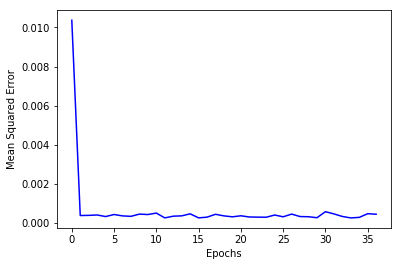

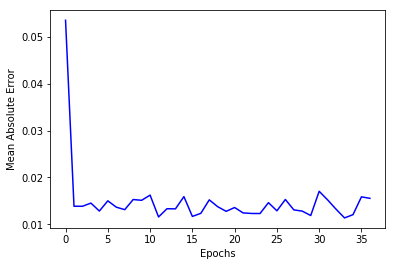

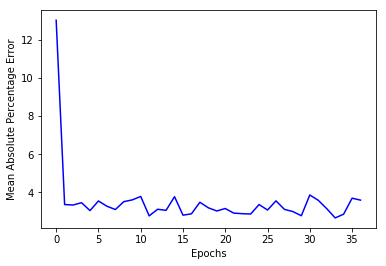

In [16]:
plt.plot(mlp_hist.history['loss'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

plt.plot(mlp_hist.history['mean_absolute_error'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

plt.plot(mlp_hist.history['mean_absolute_percentage_error'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()


### LSTM Model

In [17]:
from models.LSTMModel import LSTMModel
lstm = LSTMModel(ticker, data, num_of_days)
lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 256)            267264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 792,833
Trainable params: 792,833
Non-trainable params: 0
_________________________________________________________________


In [18]:
lstm.compile()
lstm_hist = lstm.fit(500)
lstm.load_weights()

Train on 2076 samples, validate on 2077 samples
Epoch 1/500
2076/2076 [==============================] - 3s 2ms/step - loss: 0.0173 - mean_absolute_percentage_error: 18.7484 - mean_absolute_error: 0.0796 - val_loss: 0.0360 - val_mean_absolute_percentage_error: 6.4179 - val_mean_absolute_error: 0.1272

Epoch 00001: val_loss improved from inf to 0.03600, saving model to weights/lstm/TATAMOTORS.NS.weights.best.hdf5
Epoch 2/500
2076/2076 [==============================] - 2s 822us/step - loss: 0.0043 - mean_absolute_percentage_error: 10.4484 - mean_absolute_error: 0.0464 - val_loss: 0.0232 - val_mean_absolute_percentage_error: 6.6774 - val_mean_absolute_error: 0.1086

Epoch 00002: val_loss improved from 0.03600 to 0.02320, saving model to weights/lstm/TATAMOTORS.NS.weights.best.hdf5
Epoch 3/500
2076/2076 [==============================] - 2s 821us/step - loss: 0.0036 - mean_absolute_percentage_error: 9.5487 - mean_absolute_error: 0.0420 - val_loss: 0.0426 - val_mean_absolute_percentage_err

In [19]:
lstm_score = lstm.evaluate()

1039/1039 [==============================] - 0s 134us/step


In [20]:
print('''Mean squared error is {},
Mean absolute error is {},
Mean absolute percentage error is {}'''.format(*lstm_score))

Mean squared error is 1.526437733354651,
Mean absolute error is 25.133804756362814,
Mean absolute percentage error is 1.1516672231120715


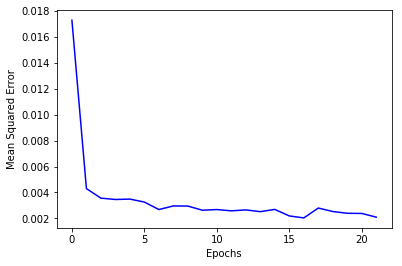

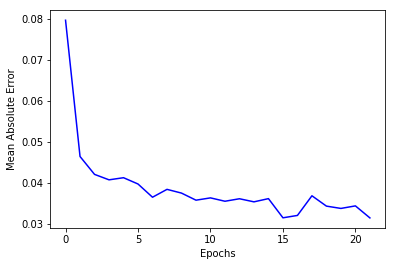

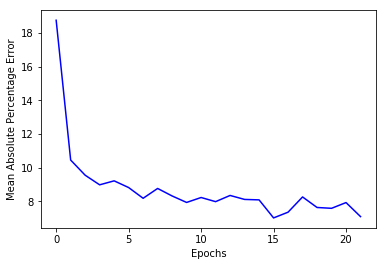

In [21]:
plt.plot(lstm_hist.history['loss'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

plt.plot(lstm_hist.history['mean_absolute_error'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

plt.plot(lstm_hist.history['mean_absolute_percentage_error'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

## Trial Run

In [22]:
from utils.data_utils import preprocess
test_data = get_data(ticker, '2018-11-01', '2019-01-31')
x_data, y_data = preprocess(test_data, num_of_days)

[*********************100%***********************]  1 of 1 downloaded


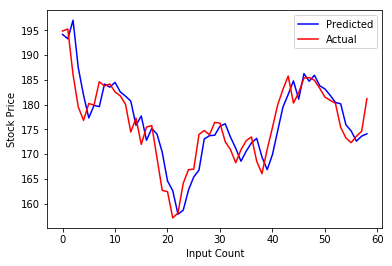

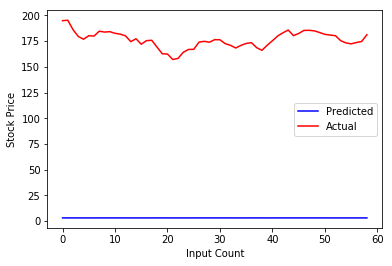

In [23]:
import matplotlib.pyplot as plt

mlp_y_pred = mlp.predict(x_data)

plt.plot(mlp_y_pred, color='blue', label='Predicted')
plt.plot(y_data, color='red', label='Actual')
plt.xlabel('Input Count')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

knn_y_pred = knn.predict(x_data)
plt.plot(knn_y_pred, color='blue', label='Predicted')
plt.plot(y_data, color='red', label='Actual')
plt.xlabel('Input Count')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
mlp_score = mlp.score(y_data, mlp_y_pred)

In [25]:
mlp_score

(14.472929021911197, 2.984470587261649, 1.7075447820932583)

In [26]:
import numpy as np
val = [
    [181.50, 182.45, 177.65, 179.55],
    [180.20, 181.40, 177.60, 180.00],
    [181.00, 184.70, 179.50, 182.25],
    [182.00, 184.50, 180.75, 182.85]
      ]
val = np.array([val])

pred = mlp.predict(val)

print(pred)

[[182.50104]]
